# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



## Task 1



**Summary of answers**

For every column in the data:

a. State wether the values match the description given in the table above.
-     product_id: conforms, observed as a series of integer from 1 to 1500 step 1.
-     category: conforms, but the string '-' was substituted for null values.
-     animal: conforms, only expected data is included.
-     size: does not conform, there is no organized format.
-     price: does not conform, not float data type because null values were subsituted with 'unlisted'.
-     sales: conforms, float data type and there are no negative values.
-     rating: conforms, but there are null values.
-     repeat_purchase: conforms, only 1 and 0 are included.

b. State the number of missing values in the column.
-     product_id: 0
-     category: 25
-     animal: 0
-     size: 0
-     price: 150
-     sales: 0
-     rating: 150
-     repeat_purchase: 0

c. Describe what you did to make values match the description if they did not match.
-     product_id: none
-     category: '-' was replaced to 'unknown'.
-     animal: none
-     size: capitalize function was used for format uniformity.
-     price: created a temporary column that drops 'unlisted' to compute median then used it to substitute.
-     sales: none
-     rating: filling null values with 0.
-     repeat_purchase: none
    
Detailed steps done are shown below.

**Data Exploration**

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pet_supplies = pd.read_csv('pet_supplies_2212.csv')

print(pet_supplies.dtypes)
print(pet_supplies.head())
print(pet_supplies.tail())

product_id           int64
category            object
animal              object
size                object
price               object
sales              float64
rating             float64
repeat_purchase      int64
dtype: object
   product_id  category animal    size  price    sales  rating  repeat_purchase
0           1      Food   Bird   large   51.1  1860.62     7.0                1
1           2   Housing   Bird  MEDIUM  35.98   963.60     6.0                0
2           3      Food    Dog  medium  31.23   898.30     5.0                1
3           4  Medicine    Cat   small  24.95   982.15     6.0                1
4           5   Housing    Cat   Small  26.18   832.63     7.0                1
      product_id   category animal  ...    sales rating  repeat_purchase
1495        1496       Food   Bird  ...  1203.36    5.0                0
1496        1497  Equipment    Dog  ...  1099.97    5.0                0
1497        1498       Food   Fish  ...   724.02    3.0                

String data types are automatically coverted to objects in pandas to save pointers to objects.

The data type corresponds correctly with the description of the columns except for price. There are also inconsistencies on string cases in the size column. Distinct values will be explored in the data cleaning process and the price column will be checked if there are non-numeric values.

**Data validation, cleaning, and preparation.**

Ideally, removing values would be the initial cleaning procedure to free up space. Hence, checking of null values would be the first step.

In [39]:
pet_supplies.isna().sum()

product_id           0
category             0
animal               0
size                 0
price                0
sales                0
rating             150
repeat_purchase      0
dtype: int64

Since there are no null values in repeat_purchase column, no observations will be removed. Null values in the rating is replaced with 0.

In [40]:
filled_pet_supplies = pet_supplies.fillna(0)
filled_pet_supplies.isna().sum()

product_id         0
category           0
animal             0
size               0
price              0
sales              0
rating             0
repeat_purchase    0
dtype: int64

Checking product_id column:

During data exploration, the logical order of the product_id is increments of 1 starting from 1 to 1500. Ids that are not within these values might be misplaced. There should also be no duplicates since this is the primary key hence, a unique identifier.

In [41]:

misplaced_prod_id = filled_pet_supplies['product_id'][(filled_pet_supplies['product_id'] < 1) & (filled_pet_supplies['product_id'] > 1500)]
print(misplaced_prod_id)
print(filled_pet_supplies['product_id'].duplicated().any())

Series([], Name: product_id, dtype: int64)
False


Checking category column:

In [42]:
cat_unique = filled_pet_supplies['category'].value_counts()
print(cat_unique)

Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
-             25
Name: category, dtype: int64


Replacing the filler '-' with 'Unknown'.

In [43]:
filled_pet_supplies['category'] = filled_pet_supplies['category'].replace(['-'],'Unknown')
cat_unique_replaced = filled_pet_supplies['category'].value_counts()
print(cat_unique_replaced)

Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
Unknown       25
Name: category, dtype: int64


Checking animal column:

In [44]:
ani_unique = filled_pet_supplies['animal'].value_counts()
print(ani_unique)

Cat     567
Fish    369
Dog     367
Bird    197
Name: animal, dtype: int64


Checking size column:

In [45]:
size_unique = filled_pet_supplies['size'].value_counts()
print(size_unique)

small     372
medium    233
Small     225
SMALL     157
Medium    150
large     122
MEDIUM    109
Large      75
LARGE      57
Name: size, dtype: int64


Cleaning the column using capitalize function.

In [46]:
filled_pet_supplies['size'] = filled_pet_supplies['size'].str.capitalize()
size_unique_capitalized = filled_pet_supplies['size'].value_counts()
print(size_unique_capitalized)

Small     754
Medium    492
Large     254
Name: size, dtype: int64


Checking price column:

It is noticed that the price data type is object and there are no null values. It is possible that the data filler used is a string. Non-numeric values are identified using the code below.

In [47]:
not_float = pd.to_numeric(filled_pet_supplies['price'], errors='coerce').isna()
print(filled_pet_supplies['price'][not_float].unique())
print(filled_pet_supplies['price'][not_float].value_counts())

['unlisted']
unlisted    150
Name: price, dtype: int64


Replace the string values with the median value computed using a temporary column then convert the column data type to float and round the values to 2 decimals.

In [48]:
to_median = pd.to_numeric(filled_pet_supplies['price'], errors='coerce')
to_median.dropna()
filled_pet_supplies['price'] = filled_pet_supplies['price'].replace(['unlisted'],to_median.median())
filled_pet_supplies['price'] = filled_pet_supplies['price'].astype(float).round(2)

print(to_median.median())
print(filled_pet_supplies['price'][not_float].unique())

28.064999999999998
[28.06]


Checking if there are negative prices

In [49]:
neg_price = filled_pet_supplies['price'][filled_pet_supplies['price'] <= 0]
print(neg_price)

Series([], Name: price, dtype: float64)


Checking sales column:

It's already confirmed that there are no null values. Check for zero or negative values.

In [50]:
invalid_sales = filled_pet_supplies['sales'][filled_pet_supplies['sales'] <= 0]
print(invalid_sales)
print(filled_pet_supplies['sales'])

Series([], Name: sales, dtype: float64)
0       1860.62
1        963.60
2        898.30
3        982.15
4        832.63
         ...   
1495    1203.36
1496    1099.97
1497     724.02
1498     658.66
1499     826.08
Name: sales, Length: 1500, dtype: float64


The sales column seems clean since there are no null or negative values and the data type is correct.

Checking rating column:

In [51]:
invalid_rating = filled_pet_supplies['rating'][(filled_pet_supplies['rating'] > 10) | (filled_pet_supplies['rating'] < 0)]
print(filled_pet_supplies['rating'][filled_pet_supplies['rating']==0].value_counts())
print(invalid_rating)

0.0    150
Name: rating, dtype: int64
Series([], Name: rating, dtype: float64)


The rating column also seems clean since are no null or negative values in the rating column and the data type is correct.

Checking repeat_purchase column:

In [52]:
uni_rp = filled_pet_supplies['repeat_purchase'].value_counts()
print(uni_rp)

1    906
0    594
Name: repeat_purchase, dtype: int64


The count of distinct values of 1 and 0 is 1500. Hence, the column repeat_purchase is also clean.

## Task 2

Create a visualization that shows how many products are repeat purchases. Use the visualization to:

a. State which category of the variable repeat purchases has the most observations.

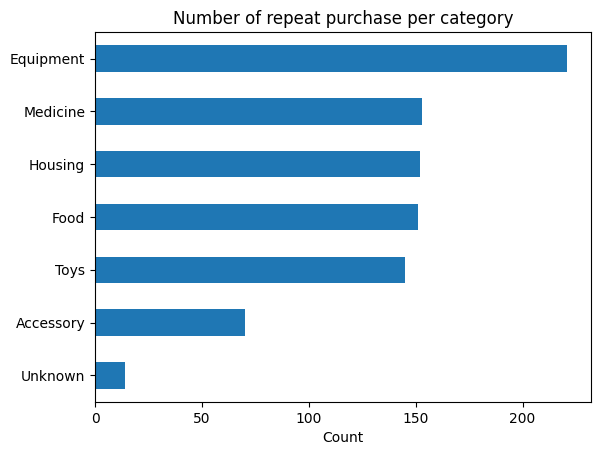

In [53]:
filled_pet_supplies.groupby('category')['repeat_purchase'].sum().sort_values().plot(kind='barh')
plt.title('Number of repeat purchase per category')
plt.xlabel('Count')
plt.ylabel('')
plt.show()

Based on the graph, equipment has the most observations in repeat purchases. However, this might be because that category has the most purchases as seen in the table from task 1. Hence the ratio of successful repeat purchases per category is computed to know if the category has a significant effect.

b. Explain wether the observations are balanced accross categories of the variable repeat purchases.

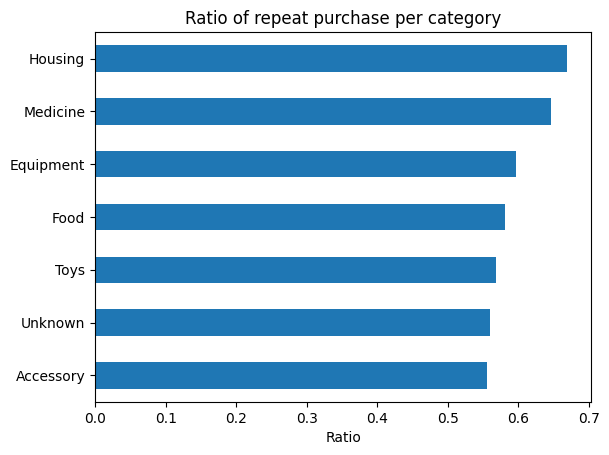

In [54]:
filled_pet_supplies.groupby('category')['repeat_purchase'].mean().sort_values().plot(kind='barh')
plt.title('Ratio of repeat purchase per category')
plt.xlabel('Ratio')
plt.ylabel('')
plt.show()

If the ratios are investigated, there is no significant effect on the category on repeat purchases.

**Conclusion:**

When looking at the count, the equipment category has the highest number of repeat purchases, this is because equipment also has the highest amount of category purchases. However, if the ratio is investigated which is more accurate when checking if category has an effect on repeat purchases, the chart shows no significant difference between categories.

## Task 3

Describe the distribution of all sales. Your answer must include visualization that shows distribution.

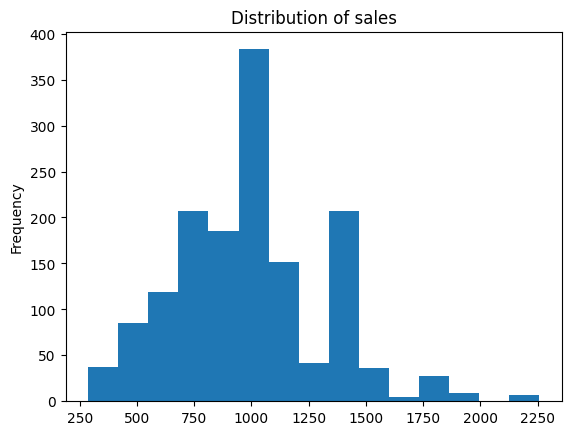

In [55]:
filled_pet_supplies['sales'].plot(kind='hist',bins=15)
plt.title('Distribution of sales')
plt.show()

The distribution of sales has a peak on 1000 and right-skewed because there are a lot of high sales outliers. This could be seen easily on the boxplot below.

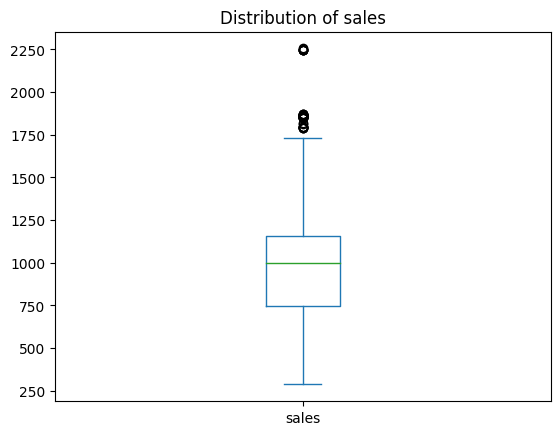

In [56]:
filled_pet_supplies['sales'].plot(kind='box')
plt.title('Distribution of sales')
plt.show()

## Task 4

Describe the relationship between repeat purchases and sales. Your answer must include a visualization to demonstrate the relationship.

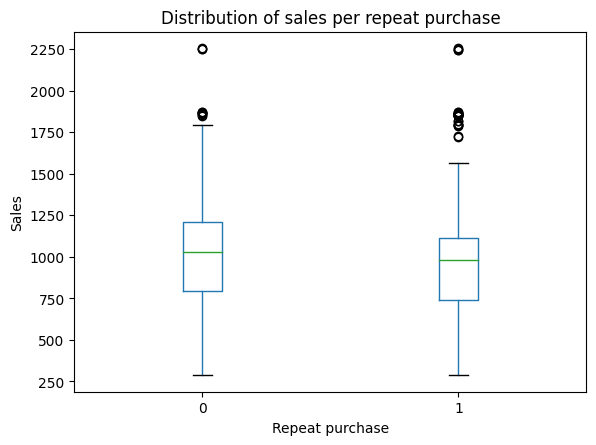

In [57]:
rel = pd.DataFrame(filled_pet_supplies,columns=['sales','repeat_purchase'])
filled_pet_supplies.boxplot(by='repeat_purchase',column=['sales'],grid=False)
plt.suptitle('')
plt.title('Distribution of sales per repeat purchase')
plt.xlabel('Repeat purchase')
plt.ylabel('Sales')
plt.show()

The repeat purchase plot has a slightly lower median and shorter whiskers compared to the non repeat purchase category. This could imply that relative low sales products from last year are achieving more repeat purchases compared with other relative high sales products. It is recommended to do a statistical analysis of the two categories to determine if there is a significant difference.